<a href="https://colab.research.google.com/github/jessedso99/Ciencia-de-Dados-Bootcamp-Unimed-BH-DIO/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
from google.colab import files
arq= files.upload()

Saving supermarket_sales_500L.xlsx to supermarket_sales_500L.xlsx


In [ ]:
df= pd.read_excel("supermarket_sales_500L.xlsx")
df.shape
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [ ]:
#Total = (val. unit* units)+ tax 5%
  # Qual foi a receita total em cada ano?
df.groupby(df["Date"].dt.year)["Total"].sum()

Date
2019    58906.6800
2020    51080.8095
2021    50965.5405
Name: Total, dtype: float64

In [ ]:
#Qual foi o Lucro total em cada ano??
df.groupby(df["Date"].dt.year)["gross income"].sum()

Date
2019    2805.0800
2020    2432.4195
2021    2426.9305
Name: gross income, dtype: float64

In [ ]:
#verificando se temos celulas em branco
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#Lucro por ano em cada cidade
pd.options.display.float_format = 'R$ {:,.2f}'.format
df.groupby([df["Date"].dt.year, "City"])["gross income"].sum()

Date  City     
2019  Mandalay    R$ 1,031.78
      Naypyitaw     R$ 872.44
      Yangon        R$ 900.87
2020  Mandalay      R$ 752.15
      Naypyitaw     R$ 927.10
      Yangon        R$ 753.17
2021  Mandalay      R$ 856.66
      Naypyitaw     R$ 761.85
      Yangon        R$ 808.42
Name: gross income, dtype: float64

In [ ]:
#pegando os dados acima, armazenando em um dataframe e dispondo-os de maneira relacional com RESET_INDEX()
lucro_ano= df.groupby([df["Date"].dt.year, "City"])["gross income"].sum().reset_index()
lucro_ano

,Date,City,gross income
0,2019,Mandalay,"R$ 1,031.78"
1,2019,Naypyitaw,R$ 872.44
2,2019,Yangon,R$ 900.87
3,2020,Mandalay,R$ 752.15
4,2020,Naypyitaw,R$ 927.10
5,2020,Yangon,R$ 753.17
6,2021,Mandalay,R$ 856.66
7,2021,Naypyitaw,R$ 761.85
8,2021,Yangon,R$ 808.42


In [ ]:
#Total de vendas de cada Product line
df[df["Date"].dt.year== 2019].groupby("Product line")["Quantity"].sum().sort_values(ascending= False)

Product line
Fashion accessories       215
Electronic accessories    208
Home and lifestyle        187
Sports and travel         186
Food and beverages        145
Health and beauty          90
Name: Quantity, dtype: int64

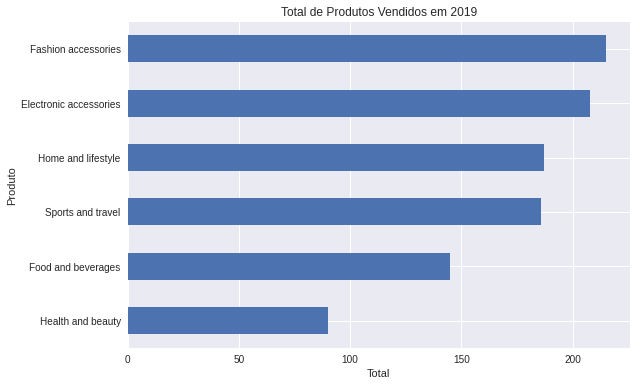

In [ ]:
#Grafico Total de Produtos Vendidos em 2019
df[df["Date"].dt.year== 2019].groupby("Product line")["Quantity"].sum().sort_values(ascending= True).plot.barh(figsize=(9,6), title= "Total de Produtos Vendidos em 2019")
plt.xlabel("Total")
plt.ylabel("Produto");

In [ ]:
#Lucro em cada ano
df.groupby(df["Date"].dt.year)["gross income"].sum()

Date
2019   R$ 2,805.08
2020   R$ 2,432.42
2021   R$ 2,426.93
Name: gross income, dtype: float64

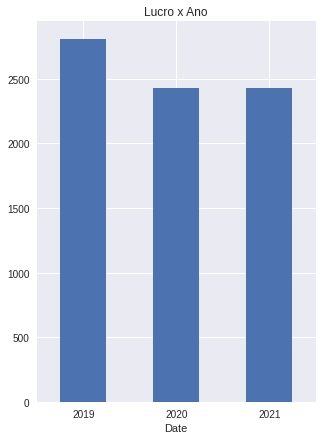

In [ ]:
#plot Lucro em cada ano
df.groupby(df["Date"].dt.year)["gross income"].sum().plot.bar(title="Lucro x Ano", figsize=(5,7))
plt.xticks(rotation= "horizontal");

In [ ]:
#Metodos de pagamentos usasdos pelos usuarios 
df.groupby(["Gender", "Payment"])["Quantity"].sum().reset_index()

,Gender,Payment,Quantity
0,Female,Cash,566
1,Female,Credit card,444
2,Female,Ewallet,437
3,Male,Cash,421
4,Male,Credit card,430
5,Male,Ewallet,459


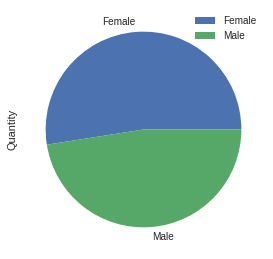

In [ ]:
#Quem consome mais, homem ou mulher??
df.groupby("Gender")["Quantity"].sum().plot.pie(figsize=(4.5,4.5), legend=True);

#ANALISANDO APENAS OS RESULTADOS DO ANO DE 2019


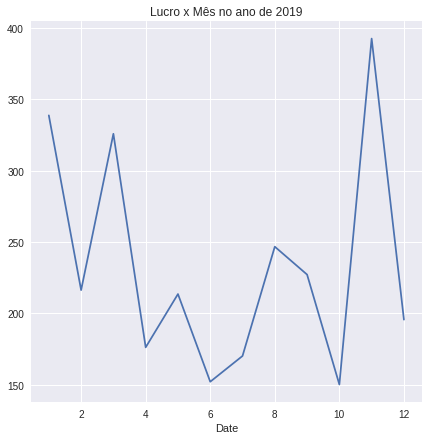

In [ ]:
#ANALISANDO APENAS OS RESULTADOS DO ANO DE 2019
df2019= df[df["Date"].dt.year== 2019]
df2019.groupby(df2019["Date"].dt.month)["gross income"].sum().plot(title= "Lucro x Mês no ano de 2019", figsize= (7,7));

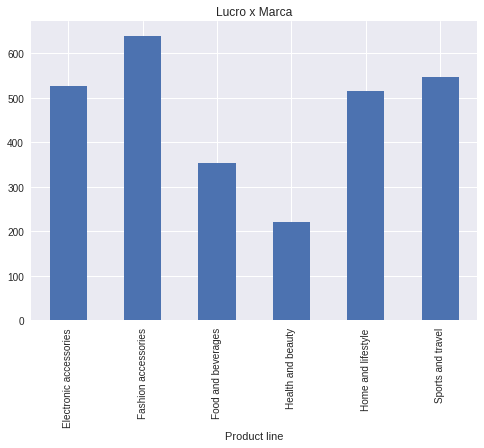

In [ ]:
df2019.groupby("Product line")["gross income"].sum().plot.bar(title= "Lucro x Marca");

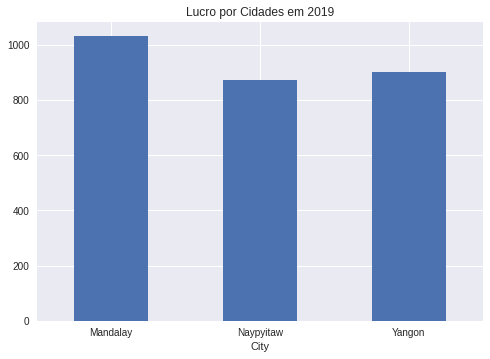

In [ ]:
#qual cidade vendeu mais em 2019?
df2019.groupby("City")["gross income"].sum().plot.bar(title= "Lucro por Cidades em 2019")
plt.xticks(rotation= "horizontal");

In [ ]:
df2019["gross income"].describe()

count   R$ 177.00
mean     R$ 15.85
std      R$ 12.18
min       R$ 0.51
25%       R$ 5.99
50%      R$ 12.73
75%      R$ 22.37
max      R$ 49.49
Name: gross income, dtype: float64

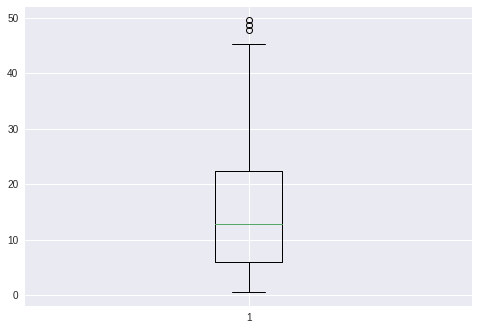

In [ ]:
plt.boxplot(df2019["gross income"]);

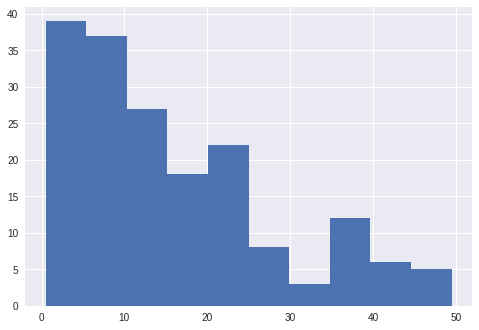

In [ ]:
#histograma dos valores do lucro
plt.hist(df2019["gross income"]);

In [ ]:
#menor lucro
df2019["gross income"].min()

0.5085

In [ ]:
#maior lucro
df2019["gross income"].max()

49.49

In [ ]:
#buscando valores usando filtros
df2019.loc[(df2019["gross income"]== 49.49) | (df2019["gross income"]>= 45)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
74,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,R$ 97.37,10,R$ 48.69,"R$ 1,022.38",2019-03-29,13:48:00,Credit card,R$ 973.70,R$ 4.76,R$ 48.69,R$ 4.90
225,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,R$ 98.98,10,R$ 49.49,"R$ 1,039.29",2019-03-06,16:20:00,Credit card,R$ 989.80,R$ 4.76,R$ 49.49,R$ 8.70
227,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,R$ 95.44,10,R$ 47.72,"R$ 1,002.12",2019-12-07,13:45:00,Cash,R$ 954.40,R$ 4.76,R$ 47.72,R$ 5.20
326,325-77-6186,A,Yangon,Member,Female,Home and lifestyle,R$ 90.65,10,R$ 45.33,R$ 951.83,2019-01-10,10:53:00,Ewallet,R$ 906.50,R$ 4.76,R$ 45.33,R$ 7.30


In [ ]:
#salvando/exportando dataframes
df2019.to_csv("df2019vendas - teste.csv", index= False)